#### https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=TRENDING&suggestionId=mobiles&requestId=ddf9a58c-49be-452a-8253-ad634b2ef9c2//2

In [4]:
data = []

a= []
Name = []           #1
Colour = []         #2
Ram = []            #3
Rom = []            #4
Screen_size = []    #5
Rear_cam = []       #6
Front_cam = []      #7
Battery = []        #8
Processor = []      #9
Price = []          #10
Link = []           #11

In [5]:
Name.clear()
Colour.clear()
Rom.clear()
Ram.clear()
Screen_size.clear()
Rear_cam.clear()
Front_cam.clear()
Battery.clear()
Processor.clear()
Price.clear()
a.clear()

In [2]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests

In [7]:
for i in range(1,26):
    page = requests.get('https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=2&as-type=TRENDING&suggestionId=mobiles&requestId=ddf9a58c-49be-452a-8253-ad634b2ef9c2/page={}'.format(i))
    
    soup = BeautifulSoup(page.text)
    
    #1 tracking the Name of the mobile phones
    
    name = soup.findAll('div', {'class' : '_4rR01T'})
    
    for i in name:
        Name.append(i.text.split(' (')[0])
     
    #2 tracking the Colour of the mobile phones
    
    for i in name:
        Colour.append(i.text.split(' (')[1].split(',')[0])
    
    
    #3 tracking the Rom of the mobile phones
    
    data1 = soup.findAll('ul', {'class': '_1xgFaf'})
    data1 = [ i.text for i in data1]
    
    for i in data1:
        Rom.append(i.split('|')[1].split()[0])
        
    #4 tracking the Ram of the mobile phones
    
    for i in data1:
        Ram.append(i.split('|')[0].split()[0])
        
    #5 tracking the Screen_size of the mobile phones
    
    for i in data1:
        Screen_size.append(i.split('(')[1].split()[0])    
        
     
    #6 tracking the Rear_cam of the mobile phones
    for i in data1 :
        Rear_cam.append(re.findall(r'\d+MP', i)[0])

    
    #7 tracking the Front_cam of the mobile phones
    
    for i in data1:
        Front_cam.append(i.split('Fro')[0].split('| ')[-1].split('M')[0])
        
        
    #8 tracking the Battery of the mobile phones    
    for i in data1:
        Battery.append(i.split('Front Camera')[1].split()[0])
        
        
    #9 tracking the Processor of the mobile phones
    for i in data1:
        Processor.append(i.split('Battery')[1].split('Proc')[0])
        
        
    #10 tracking the Price of the mobile phones    
    prices = soup.findAll('div', {'class' : '_30jeq3 _1_WHN1'}) 
    for i in prices:
        Price.append(i.text.strip('₹')) 

data1[6:8]

name = soup.findAll('div', {'class' : '_4rR01T'})
for i in name:
    Colour.append(i.text.split(' (')[1].split(',')[0])
Colour    

name[7:9]

In [8]:
print(len(Colour)), print(len(Name)), print(len(Rom)), print(len(Ram)), print(len(Screen_size)),print(len(Rear_cam))
print(len(Front_cam)), print(len(Battery)), print(len(Processor)), print(len(Price))

600
600
600
600
600
600
600
600
600
600


(None, None, None, None)

# DataFrame

In [14]:
li = {'Name': Name, 'Colour': Colour, 'Rom' : Rom, 'Ram' : Ram, 'Screen_size': Screen_size, 'Rear_cam': Rear_cam ,
      'Front_cam': Front_cam, 'Battery' : Battery, 'Processor' : Processor, 'Price': Price}

In [15]:
li.keys()

dict_keys(['Name', 'Colour', 'Rom', 'Ram', 'Screen_size', 'Rear_cam', 'Front_cam', 'Battery', 'Processor', 'Price'])

In [16]:
Mobile_spec = pd.DataFrame(li)

In [17]:
Mobile_spec

,Name,Colour,Rom,Ram,Screen_size,Rear_cam,Front_cam,Battery,Processor,Price


## Cleaning the data

In [13]:
#1 to remove the MP

Rear_cam = [i.split('M')[0] for i in Rear_cam]

In [14]:
#2 removeing the Comma from the Price column

for i in Price:
    a.append(i.split(',')[0] + i.split(',')[1] )


In [15]:
#3 conevrting in to the data types

# converting the string values of 'Ram', 'Rom', 'Front_cam', 'Rear_cam' ,'Price' and 'Battery'  to int values
# Screen_size values to float 
Rom = [int(i) for i in Rom]
Ram = [int(i) for i in Ram]
Screen_size = [float(i) for i in Screen_size]
Rear_cam = [int(i) for i in Rear_cam]
Front_cam = [int(i) for i in Front_cam]
Battery = [int(i) for i in Battery]
a = [int(i) for i in a]

In [16]:
li = {'Name': Name, 'Colour': Colour, 'Rom' : Rom, 'Ram' : Ram, 'Screen_size': Screen_size, 'Rear_cam': Rear_cam ,
      'Front_cam': Front_cam, 'Battery' : Battery, 'Processor' : Processor, 'Price': a}

In [17]:
Mobile_specNew = pd.DataFrame(li)

In [18]:
Mobile_specNew

,Name,Colour,Rom,Ram,Screen_size,Rear_cam,Front_cam,Battery,Processor,Price
0,realme C20,Cool Grey,32,2,6.50,8,5,5000,MediaTek Helio G35,7499
1,realme C20,Cool Blue,32,2,6.50,8,5,5000,MediaTek Helio G35,7499
2,POCO C31,Royal Blue,64,4,6.53,13,5,5000,MediaTek Helio G35,8999
3,OPPO K10,Black Carbon,128,6,6.59,50,16,5000,Qualcomm Snapdragon 680,14990
4,MOTOROLA G60,Soft Silver,128,6,6.78,108,32,6000,Qualcomm Snapdragon 732G,16999
...,...,...,...,...,...,...,...,...,...,...
595,SAMSUNG Galaxy F23 5G,Forest Green,128,4,6.60,50,8,5000,Qualcomm Snapdragon 750G,15999
596,realme 9i,Prism Blue,64,4,6.60,50,16,5000,Qualcomm Snapdragon 680 (SM6225),12999
597,REDMI 10,Caribbean Green,128,6,6.70,50,5,6000,Qualcomm Snapdragon 680,12999
598,REDMI 10,Midnight Black,128,6,6.70,50,5,6000,Qualcomm Snapdragon 680,12999


In [20]:
Mobile_specNew.dtypes


Name            object
Colour          object
Rom              int64
Ram              int64
Screen_size    float64
Rear_cam         int64
Front_cam        int64
Battery          int64
Processor       object
Price            int64
dtype: object

In [19]:
Mobile_specNew.isnull().sum()

Name           0
Colour         0
Rom            0
Ram            0
Screen_size    0
Rear_cam       0
Front_cam      0
Battery        0
Processor      0
Price          0
dtype: int64

### Data into the csv file

In [137]:
Mobiledata_csv = Mobile_specNew.to_csv('Mobile_spec.csv', index = False)

In [138]:
print(Mobile_specNew.Name.nunique())
Mobile_specNew.Name.unique()

13


array(['realme C20', 'POCO C31', 'OPPO K10', 'MOTOROLA G60', 'REDMI 10',
       'realme C35', 'realme C25Y', 'realme C21Y', 'REDMI 9i Sport',
       'realme 9i', 'POCO M3 Pro 5G', 'MOTOROLA e40',
       'SAMSUNG Galaxy F23 5G'], dtype=object)

In [16]:
mData = pd.read_csv("D:\learn soft\By innomatics\Web scapring project\Mobile_spec.csv")

In [17]:
mData

,Name,Colour,Rom,Ram,Screen_size,Rear_cam,Front_cam,Battery,Processor,Price
0,realme C20,Cool Grey,32,2,6.50,8,5,5000,MediaTek Helio G35,7499
1,realme C20,Cool Blue,32,2,6.50,8,5,5000,MediaTek Helio G35,7499
2,POCO C31,Royal Blue,64,4,6.53,13,5,5000,MediaTek Helio G35,8999
3,OPPO K10,Black Carbon,128,6,6.59,50,16,5000,Qualcomm Snapdragon 680,14990
4,MOTOROLA G60,Soft Silver,128,6,6.78,108,32,6000,Qualcomm Snapdragon 732G,16999
...,...,...,...,...,...,...,...,...,...,...
595,SAMSUNG Galaxy F23 5G,Forest Green,128,4,6.60,50,8,5000,Qualcomm Snapdragon 750G,15999
596,realme 9i,Prism Blue,64,4,6.60,50,16,5000,Qualcomm Snapdragon 680 (SM6225),12999
597,REDMI 10,Caribbean Green,128,6,6.70,50,5,6000,Qualcomm Snapdragon 680,12999
598,REDMI 10,Midnight Black,128,6,6.70,50,5,6000,Qualcomm Snapdragon 680,12999


In [19]:
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

### DATA ANALYSIS

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

In [18]:
warnings.filterwarnings('ignore')

In [19]:
mData.head()

,Name,Colour,Rom,Ram,Screen_size,Rear_cam,Front_cam,Battery,Processor,Price
0,realme C20,Cool Grey,32,2,6.50,8,5,5000,MediaTek Helio G35,7499
1,realme C20,Cool Blue,32,2,6.50,8,5,5000,MediaTek Helio G35,7499
2,POCO C31,Royal Blue,64,4,6.53,13,5,5000,MediaTek Helio G35,8999
3,OPPO K10,Black Carbon,128,6,6.59,50,16,5000,Qualcomm Snapdragon 680,14990
4,MOTOROLA G60,Soft Silver,128,6,6.78,108,32,6000,Qualcomm Snapdragon 732G,16999


In [144]:
mData.describe()

,Rom,Ram,Screen_size,Rear_cam,Front_cam,Battery,Price
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,75.893333,4.155000,6.576083,37.911667,8.580000,5206.666667,11673.708333
std,35.522176,1.153195,0.082726,23.273589,6.179583,405.252108,2837.248448
min,32.000000,2.000000,6.500000,8.000000,5.000000,5000.000000,7499.000000
25%,64.000000,4.000000,6.500000,13.000000,5.000000,5000.000000,9142.250000
50%,64.000000,4.000000,6.530000,50.000000,5.000000,5000.000000,10999.000000
75%,128.000000,4.000000,6.600000,50.000000,8.000000,5000.000000,13999.000000
max,128.000000,6.000000,6.780000,108.000000,32.000000,6000.000000,16999.000000


#### Interpretations

- the describe shows the mean, min, max, median etc
- minimum Rom is '32 gb' and maximum is '128 gb'
- minimum Ram is '2 gb' and maximum is '6 gb'
- minimum screen size is '6.5 inches' and maximum is '6.78 inches'
- minimum Frontcam is '5 mp' and maximum is '32mp'
- minimum Frontcam is '8 mp' and maximum is '108mp'
- minimum Price of mobile is '7499' and maximum is '16999'

In [28]:
mData.isnull().sum()

Name           0
Colour         0
Rom            0
Ram            0
Screen_size    0
Rear_cam       0
Front_cam      0
Battery        0
Processor      0
Price          0
dtype: int64

#### Interpretation

- there is no null values in the data

### Uni-varient analysis

<AxesSubplot:xlabel='count', ylabel='Rom'>

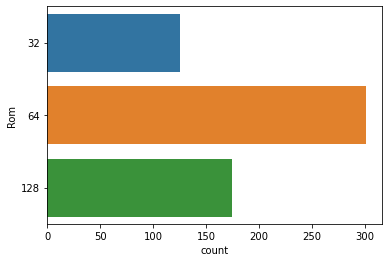

In [117]:
sns.countplot(y='Rom', data=mData) 

#### interpretations

- In this graph, The graph Btw count and Rom.
- Count is use for how many times a mobile Rom Repeat in this Mobile data.
- The highest Rom is 128 and the lowest Rom is 32 shown in this graph.
- The highest rom 128 Repeat more times and Rom 32 is repeat less times.

### Bi-varient analysis

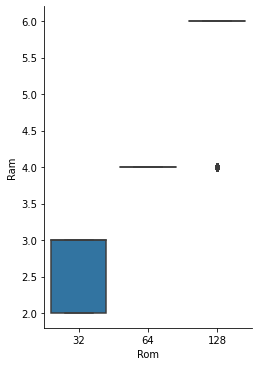

In [119]:
sns.catplot(x='Rom',y='Ram',kind = 'box' ,data=mData,aspect=0.7)

#### interpretations

- This Graph is Bi-Variate analysis graph.
- In this Graph, Graph shown between Rom and Ram.
- This graph is box graph.
- In this graph shown Rom 32 equal to Ram 3, Rom 64 equal to Ram 4 and Rom 128 equal to 4 or 8 shown in graph.

### Multi-veriant analysis

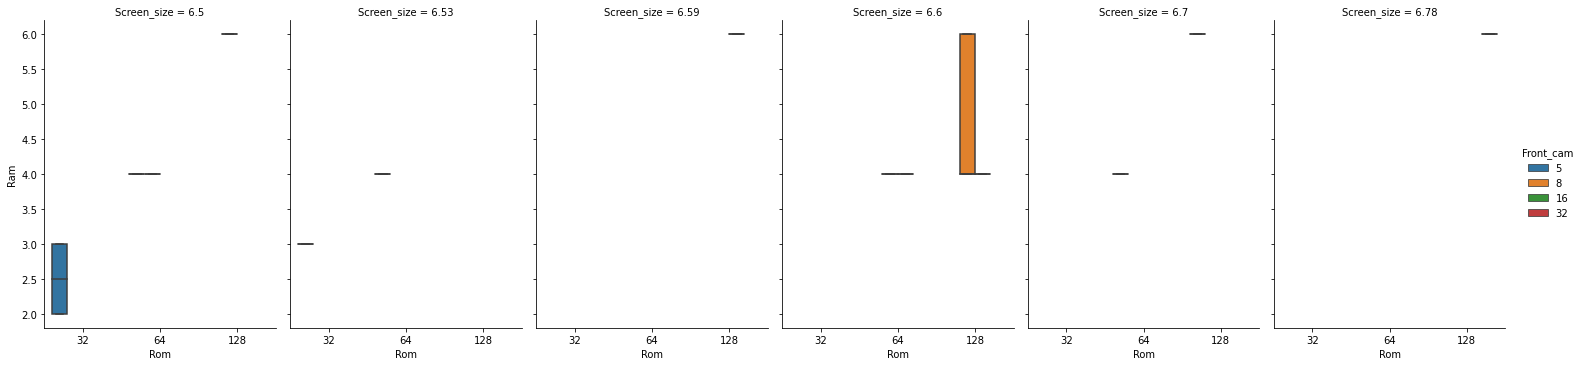

In [133]:
sns.catplot(x='Rom',y='Ram',col='Screen_size',kind = 'box', hue='Front_cam',data=mData,aspect=0.7)

#### interpretations

- This graph is Multi-variate analysis graph.
- In this graph, the graph b/w Ram, Rom, Screen_size and Front_cam.
- In this graph shown Rom is 128 equal to Ram 4 and the screen_size 6.4 or Font_cam 16.
- In this graph shown Rom is  32 equal to ram 3 and the screen size is 6.5 or Font_cam 5.

###  number of unique brands

In [146]:
print(mData.Name.nunique())

mData.Name.unique()

13


array(['realme C20', 'POCO C31', 'OPPO K10', 'MOTOROLA G60', 'REDMI 10',
       'realme C35', 'realme C25Y', 'realme C21Y', 'REDMI 9i Sport',
       'realme 9i', 'POCO M3 Pro 5G', 'MOTOROLA e40',
       'SAMSUNG Galaxy F23 5G'], dtype=object)

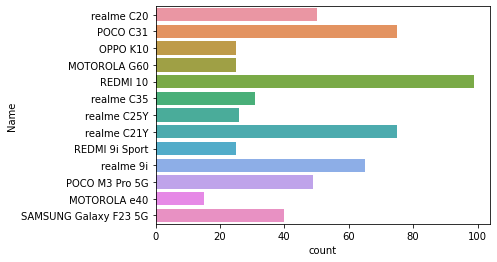

In [99]:
sns.countplot(y='Name', data=mData)
plt.show()

#### Interpretations

- This is countplot Graph btw all phones.
- In this graph shown 'Redmi 10' mobiles are more pieces then other mobiles.
- In this graph shows 'MOTOROLA e40' mobiles have less pieces are shown.

In [100]:
mData.Name.value_counts()

REDMI 10                 99
POCO C31                 75
realme C21Y              75
realme 9i                65
realme C20               50
POCO M3 Pro 5G           49
SAMSUNG Galaxy F23 5G    40
realme C35               31
realme C25Y              26
MOTOROLA G60             25
OPPO K10                 25
REDMI 9i Sport           25
MOTOROLA e40             15
Name: Name, dtype: int64

#### Interpretations


  - total number of realme c20 phones are approxmately 50
  - total number of REDMI 10 phones are 99 and etc
  - max number of phone model is REDME 10
  - min number of phone model is MOTOROLA e40

###  unique Colours 

In [101]:
print(mData.Colour.nunique())
mData.Colour.unique()

22


array(['Cool Grey', 'Cool Blue', 'Royal Blue', 'Black Carbon',
       'Soft Silver', 'Midnight Black', 'Shadow Gray', 'Glowing Green',
       'Glacier Blue', 'Caribbean Green', 'Cross Blue', 'Carbon Black',
       'Cross Black', 'Prism Blue', 'Prism Black', 'Power Black',
       'Pink Clay', 'Blue Flame', 'Aqua Blue', 'Forest Green',
       'Glowing Black', 'Metal Grey'], dtype=object)

In [238]:
mData.Colour.value_counts()

Cross Blue         50
Caribbean Green    50
Royal Blue         50
Cool Blue          50
Midnight Black     49
Prism Black        40
Glowing Green      30
Cool Grey          25
Cross Black        25
Glacier Blue       25
Shadow Gray        25
Carbon Black       25
Soft Silver        25
Prism Blue         25
Power Black        24
Aqua Blue          20
Forest Green       20
Pink Clay          15
Black Carbon       15
Blue Flame         10
Metal Grey          1
Glowing Black       1
Name: Colour, dtype: int64

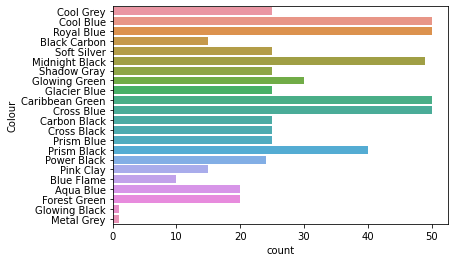

In [102]:
sns.countplot(y='Colour', data=mData)
plt.show()

#### Interpretations

- there are '22' unique colours present in the data 
- lowest present colour is 'Glowing Black' and 'Metal Grey'


###  what is the avarage price of mobile price

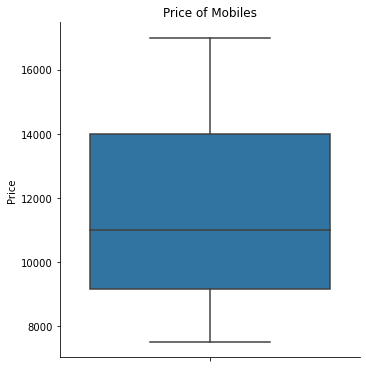

In [103]:
sns.catplot(y='Price', data=mData, kind='box')
plt.ylabel('Price')
plt.title('Price of Mobiles')
plt.show()

#### Interpretation

  - In this graph avg price of mobiles is 11000
  - in this graph shows highest mobiles price is 16999.
  - In this graph lowest price is 7499.

###  Models with the  Processor

In [104]:
mData.Processor.value_counts()

MediaTek Helio G35                   125
Qualcomm Snapdragon 680              124
Unisoc T610                           75
Qualcomm Snapdragon 680 (SM6225)      65
MediaTek Dimensity 700                49
Qualcomm Snapdragon 750G              40
Unisoc Tiger T616                     31
Unisoc T610 Octa Core                 26
Qualcomm Snapdragon 732G              25
MediaTek Helio G25                    25
UNISOC T700                           15
Name: Processor, dtype: int64

#### Interpretation

- the highly avilable Processer from the dataset is 'MediaTek Helio G35'
- the min avilable Processer from the data is 'UNISOC T700'

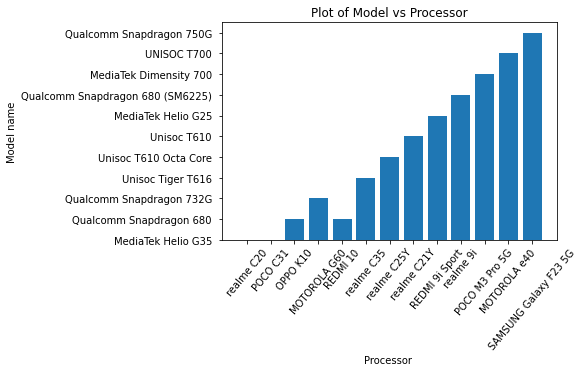

In [105]:
plt.bar(mData['Name'], mData['Processor'])
plt.xlabel('Processor ')
plt.ylabel('Model name')
plt.title('Plot of Model vs Processor')
plt.xticks(rotation = 50)
plt.show()

###  Which model has the highest and lowest price?

In [106]:
mData.groupby(['Price', 'Name']).count().loc[16999:, :'Colour']

Colour
Price Name                         
16999 MOTOROLA G60               25
      SAMSUNG Galaxy F23 5G      20

In [65]:
mData.groupby(['Price', 'Name']).count().loc[:7499, :'Colour']

,,Colour
Price,Name,
7499,realme C20,50


In [59]:
mData.Price.max(), mData.Price.min()

(16999, 7499)

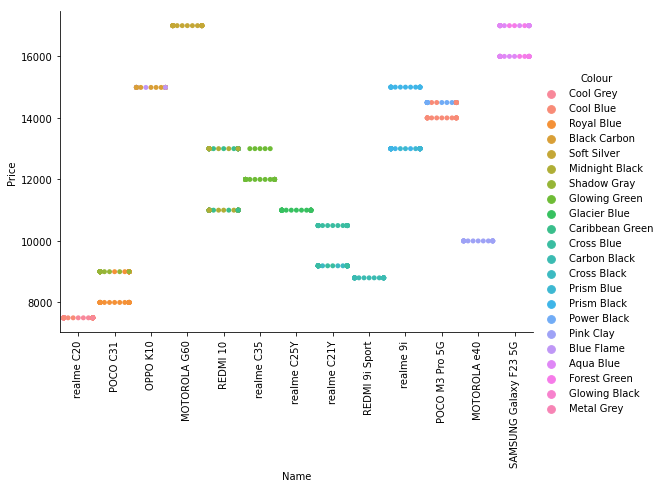

In [49]:
sns.catplot(x='Name',y='Price',kind='swarm',hue='Colour',data=mData,aspect=1.5)
plt.xticks(rotation = 90)
plt.show()

#### Interpretation

  - In this plot the mobiles MOTOROLA G60 and SAMSUNG Galaxy F23 5G models have the highest Price.
  - The lowest price mobile is realme C20.

###  Plot for the Front_cam , Rear_cam and mobile Name

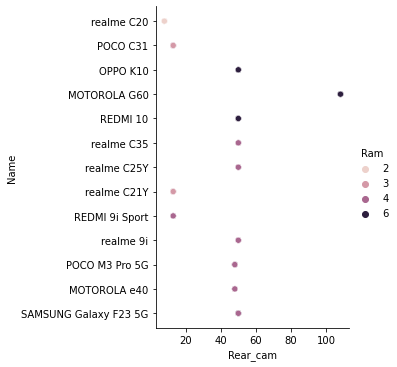

In [214]:
sns.relplot(x='Rear_cam', y='Name',hue='Ram',data=mData)
plt.show()

### Interpretations


  - REDME 10 with Rear cam of '48 mp' and which has '6gb' ram 
  - Motorola G60 with Rearcam of '108mp' , ram of '6gb'
  - Motorola G60 with Rearcam of '8mp' , ram of '6gb' and etc

###  Screen size of mobile

In [236]:
mData.Screen_size.value_counts()

6.50    215
6.60    136
6.53    100
6.70     99
6.78     25
6.59     25
Name: Screen_size, dtype: int64

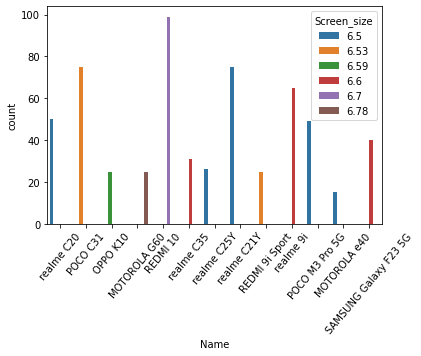

In [235]:
# segment categoric count plot Screen_size, Name

sns.countplot(x='Name', hue='Screen_size', data=mData)
plt.xticks(rotation =50 )
plt.show()

#### Interpretations


  - Screen size of  MOTOROLA G60 and REDMI 10 is '6.7' and thier count is '99'
  - the number of '6.5' inch mobile phones are '250'
  - The lowest count mobiles are POCO M3 Pro 5G

### univariant analysis for quantitative data
#### Price, Front_cam, Rear_cam, Rom , Ram and Battery

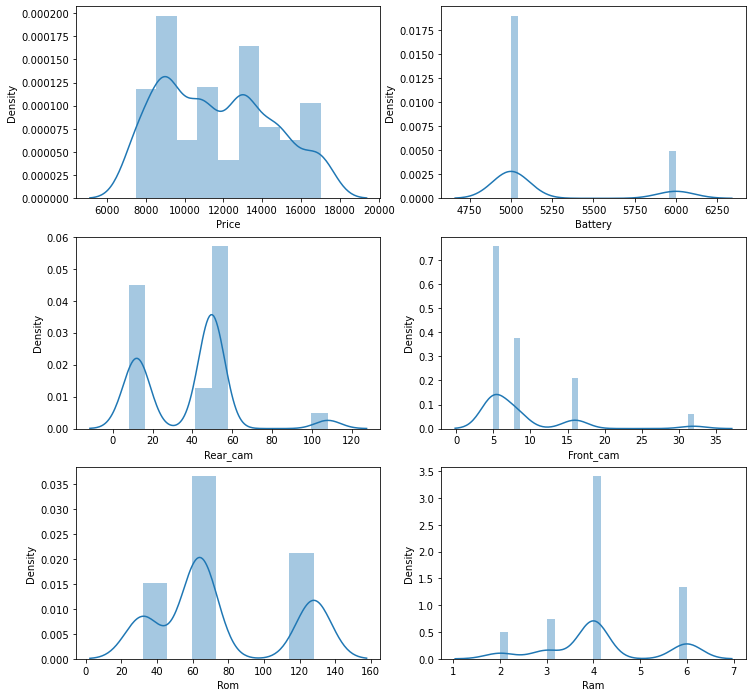

In [206]:

fix, ax = plt.subplots(3,2,figsize=(12,12))

sns.distplot(mData['Price'], ax=ax[0,0])
sns.distplot(mData['Front_cam'], ax=ax[1,1])
sns.distplot(mData['Rear_cam'], ax=ax[1,0])
sns.distplot(mData['Battery'], ax=ax[0,1])
sns.distplot(mData['Rom'], ax=ax[2,0])
sns.distplot(mData['Ram'], ax=ax[2,1])


plt.show()

#### Interpretations

- From battery plot, most of the data is distributed at '5000 mah'
- From Ram plot, most of the data is distributed at '4 gb'
- From Rom plot, most of the data is distributed at '64gb'

### pie chart btw Price or Ram


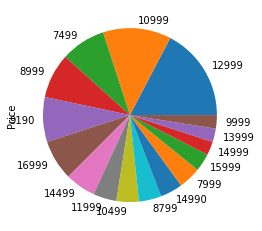

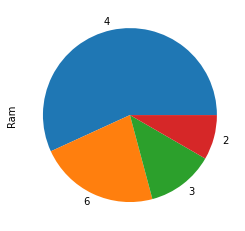

In [134]:
mData.Price.value_counts().plot.pie()
plt.show()
mData.Ram.value_counts().plot.pie()
plt.show()

#### interpretations

- This Graph is Pie chart Graph btw ram and Price
- In price chart shows How many phones are in same price, In a circle all price written.
- All prices are shown different color.
- Those which shows more area so these price phones are more in Mobiledata.

### Heat map

In [249]:
corre = mData[['Price', 'Front_cam', 'Rear_cam', 'Battery', 'Screen_size']]

In [257]:
corr = corre.corr()

Text(0.5, 1.0, 'Corelation')

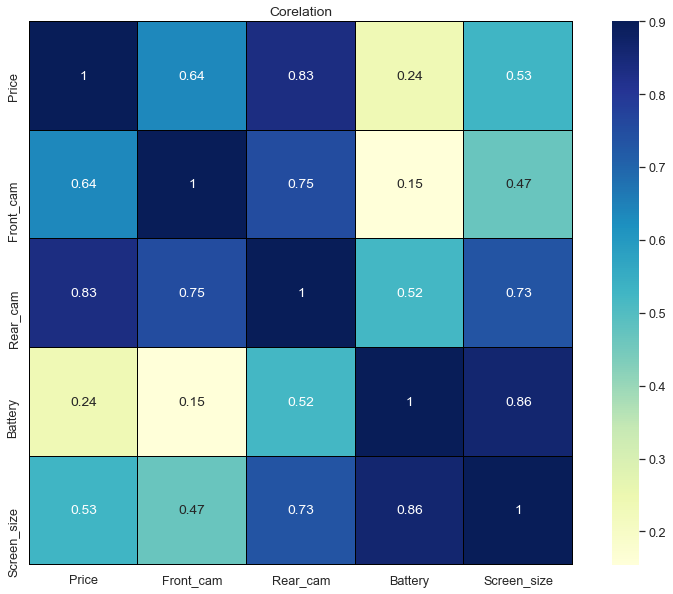

In [258]:
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(corr,  vmax=0.9, linewidths=0.02,
           square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Corelation')

#### Interpretations

- the Screensize and Price has positive correlation 
- the Screensize and Rearcam has strong positive correlation
- the Price and Rearcam has strong positive correlation
- the Battery and Frontrcam has weak positive correlation

### what are the phones avaliable in the range of 12000 to 18000 with ram of 6GB?

In [158]:
m1 = mData.query('Price > 12000 & Price < 18000 & Ram == 6')
m1

,Name,Colour,Rom,Ram,Screen_size,Rear_cam,Front_cam,Battery,Processor,Price
3,OPPO K10,Black Carbon,128,6,6.59,50,16,5000,Qualcomm Snapdragon 680,14990
4,MOTOROLA G60,Soft Silver,128,6,6.78,108,32,6000,Qualcomm Snapdragon 732G,16999
18,REDMI 10,Caribbean Green,128,6,6.70,50,5,6000,Qualcomm Snapdragon 680,12999
19,REDMI 10,Midnight Black,128,6,6.70,50,5,6000,Qualcomm Snapdragon 680,12999
23,POCO M3 Pro 5G,Cool Blue,128,6,6.50,48,8,5000,MediaTek Dimensity 700,13999
...,...,...,...,...,...,...,...,...,...,...
579,OPPO K10,Blue Flame,128,6,6.59,50,16,5000,Qualcomm Snapdragon 680,14990
587,SAMSUNG Galaxy F23 5G,Forest Green,128,6,6.60,50,8,5000,Qualcomm Snapdragon 750G,16999
591,SAMSUNG Galaxy F23 5G,Aqua Blue,128,6,6.60,50,8,5000,Qualcomm Snapdragon 750G,16999
597,REDMI 10,Caribbean Green,128,6,6.70,50,5,6000,Qualcomm Snapdragon 680,12999


In [159]:
print(m1.Name.nunique())
m1.Name.unique()

5


array(['OPPO K10', 'MOTOROLA G60', 'REDMI 10', 'POCO M3 Pro 5G',
       'SAMSUNG Galaxy F23 5G'], dtype=object)

In [160]:
print(m1.Colour.nunique())
m1.Colour.unique()

8


array(['Black Carbon', 'Soft Silver', 'Caribbean Green', 'Midnight Black',
       'Cool Blue', 'Blue Flame', 'Forest Green', 'Aqua Blue'],
      dtype=object)

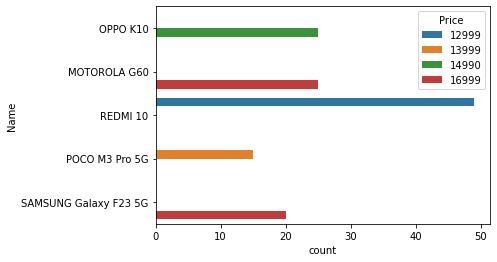

In [115]:
sns.countplot(y='Name', hue='Price',data=m1)
plt.show()

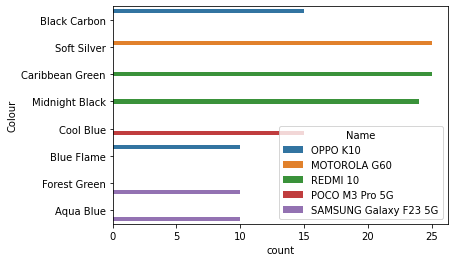

In [173]:
sns.countplot(y='Colour', hue='Name',data=m1)
plt.show()

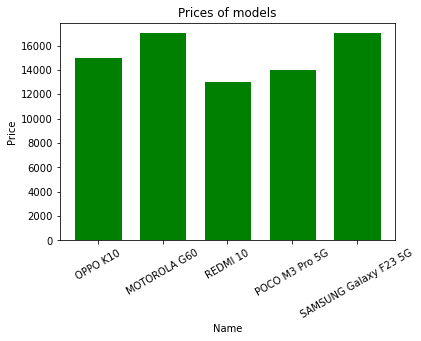

In [127]:
plt.bar('Name', 'Price', Color='green', width = 0.7, data=m1)
plt.xlabel('Name')
plt.ylabel('Price')
plt.title('Prices of models')
plt.xticks(rotation = 30)
plt.show()

#### interpretations

- there are 5 unique mobile phones are avalible between the range of 12000 to 18000.
- in that the highest price is 16999 which is MOTOROLA G60 with the ram 6gb,  Front_cam fo 33mp , Rearcam of 108mp.And 25 same mobile pieces are avalible
- highst available mobille is Redmi 10 with count of nearly 50 and its price is 12999
- least available mobile is POCO m3 pro 5g with count of around 15 and its  price 13999
- Having the 8 unique colours

### what are the phones avaliable with atleast ram of 4GB , Rear cam of 48MP and Front cam of 16MP  ?

In [164]:
mData.Rear_cam.unique()

array([  8,  13,  50, 108,  48], dtype=int64)

In [165]:
mData.Front_cam.unique()

array([ 5, 16, 32,  8], dtype=int64)

In [68]:
m2 = mData.query('Ram >= 4 & Rear_cam >=48 & Front_cam >=16')
m2

,Name,Colour,Rom,Ram,Screen_size,Rear_cam,Front_cam,Battery,Processor,Price
3,OPPO K10,Black Carbon,128,6,6.59,50,16,5000,Qualcomm Snapdragon 680,14990
4,MOTOROLA G60,Soft Silver,128,6,6.78,108,32,6000,Qualcomm Snapdragon 732G,16999
16,realme 9i,Prism Blue,64,4,6.60,50,16,5000,Qualcomm Snapdragon 680 (SM6225),12999
17,realme 9i,Prism Black,64,4,6.60,50,16,5000,Qualcomm Snapdragon 680 (SM6225),12999
21,realme 9i,Prism Black,128,4,6.60,50,16,5000,Qualcomm Snapdragon 680 (SM6225),14999
...,...,...,...,...,...,...,...,...,...,...
572,realme 9i,Prism Black,128,4,6.60,50,16,5000,Qualcomm Snapdragon 680 (SM6225),14999
578,MOTOROLA G60,Soft Silver,128,6,6.78,108,32,6000,Qualcomm Snapdragon 732G,16999
579,OPPO K10,Blue Flame,128,6,6.59,50,16,5000,Qualcomm Snapdragon 680,14990
594,realme 9i,Prism Black,64,4,6.60,50,16,5000,Qualcomm Snapdragon 680 (SM6225),12999


In [183]:
print(m2.Name.nunique())
m2.Name.unique()

3


array(['OPPO K10', 'MOTOROLA G60', 'realme 9i'], dtype=object)

In [184]:
print(m2.Colour.nunique())
m2.Colour.unique()

5


array(['Black Carbon', 'Soft Silver', 'Prism Blue', 'Prism Black',
       'Blue Flame'], dtype=object)

In [110]:
m2.Front_cam.unique()

array([16, 32], dtype=int64)

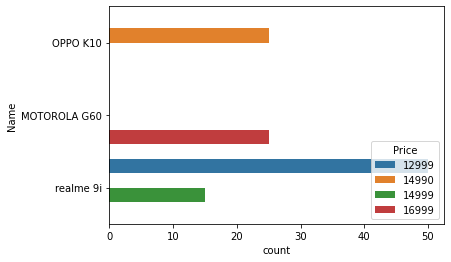

In [69]:
sns.countplot(y='Name', hue='Price',data=m2)
plt.show()

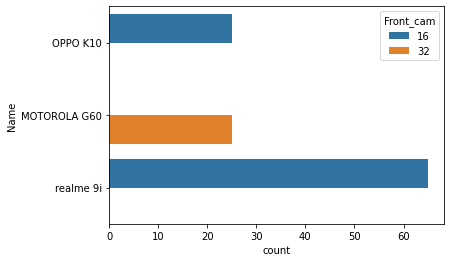

In [114]:
sns.countplot(y='Name', hue='Front_cam' ,data=m2)
plt.show()

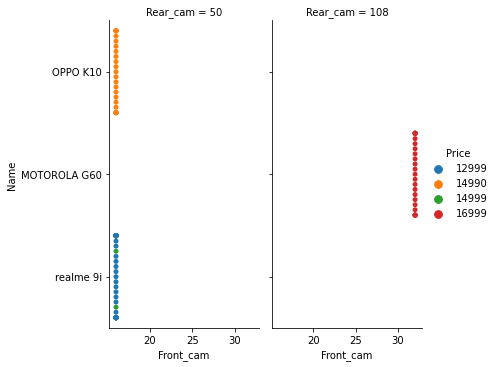

In [116]:
sns.catplot(y='Name',x='Front_cam',col='Rear_cam',kind='swarm', hue='Price',data=m2,aspect=0.6)

plt.show()

#### interpretations

- there are 3 phones available with atleast ram of 4GB , Rear cam of 48MP and Front cam of 16MP.
they are OPPO K10, MOOTOROLA G60 and realme9i
- with Rear cam 50MP OPPO K10 is available with the price of 14990 and has front cam of 16MP.
- with Rear cam 50MP realme 9i is available with the price of 12999 and has front cam of 16MP.
- with Rear cam 108MP MOTOROLA G60 is available with the price of 16999 and has front cam of 32MP.